# Heath and Self
### Modeling and Forecasting Time Series in Python

----

## Libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [2]:
# which user?
# data_directory = '../data/apple_watch_01/'
# data_directory = '../data/fitbit_01/'
data_directory = '../data/fitbit_02/'

# which data point?
# datapoint = "steps"
datapoint = "sleep"
path = data_directory+"daily_"+datapoint+".csv"

# import
series = pd.Series.from_csv(path, header=0)
series = series.tail(364)
series.index = pd.to_datetime(series.index)

print(series.tail())

Date
2019-08-09    436
2019-08-10    280
2019-08-11    391
2019-08-12    414
2019-08-13    351
Name: Sleep, dtype: int64


In [3]:
ts = series

In [4]:
# ts_log
ts_df = pd.read_csv(data_directory+datapoint+'_ts_log.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log = ts_df['Value']

# import differing results
ts_df = pd.read_csv(data_directory+datapoint+'_ts_log_diff.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log_diff = ts_df['Value']

# ts decomposition
ts_df = pd.read_csv(data_directory+datapoint+'_ts_log_decompose.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log_decompose = ts_df['Value']

In [5]:
ts_log_diff.head()
# ts_log_decompose.head()

Month
2018-08-25    0.130172
2018-08-26    0.170835
2018-08-27   -0.092606
2018-08-28   -0.284387
2018-08-29   -0.029375
Name: Value, dtype: float64

In [6]:
# Create Training and Test

split_num = round(len(ts)*.8)
train = ts_log_diff[:split_num]
test = ts_log_diff[split_num:]

# split_num = round(len(ts_log_diff)*.8)
# train = ts_log_diff[:split_num]
# test = ts_log_diff[split_num:]

forecast_num = len(test)

---

# Modeling

In [7]:
# import ARIMA modeler from Stats Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from pmdarima.arima.utils import ndiffs

### ADF Checks

In [8]:
def ADF_Test(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [9]:
ADF_Test(series)

ADF Statistic: -7.174573
p-value: 0.000000


In [10]:
ADF_Test(ts_log_diff)

ADF Statistic: -8.630748
p-value: 0.000000


In [11]:
ADF_Test(ts_log_decompose)

ADF Statistic: -9.379760
p-value: 0.000000


### ACF & PACF Plots

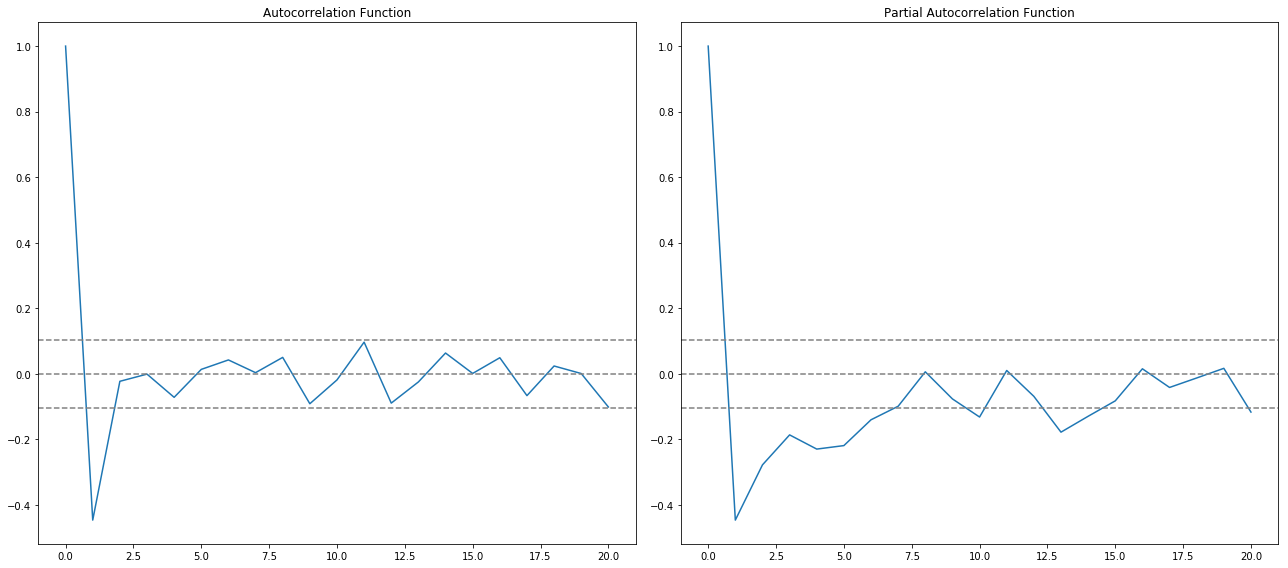

In [12]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

fig = plt.figure(figsize=(18,8))

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  354
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  41.807
Method:                       css-mle   S.D. of innovations              0.215
Date:                Sat, 17 Aug 2019   AIC                            -75.614
Time:                        18:26:34   BIC                            -60.137
Sample:                    08-25-2018   HQIC                           -69.456
                         - 08-13-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0005      0.006     -0.079      0.937      -0.013       0.012
ar.L1.D.Value    -0.5704      0.051    -11.168      0.000      -0.670      -0.470
ar.L2.D.Value    -0.2776      0.051     

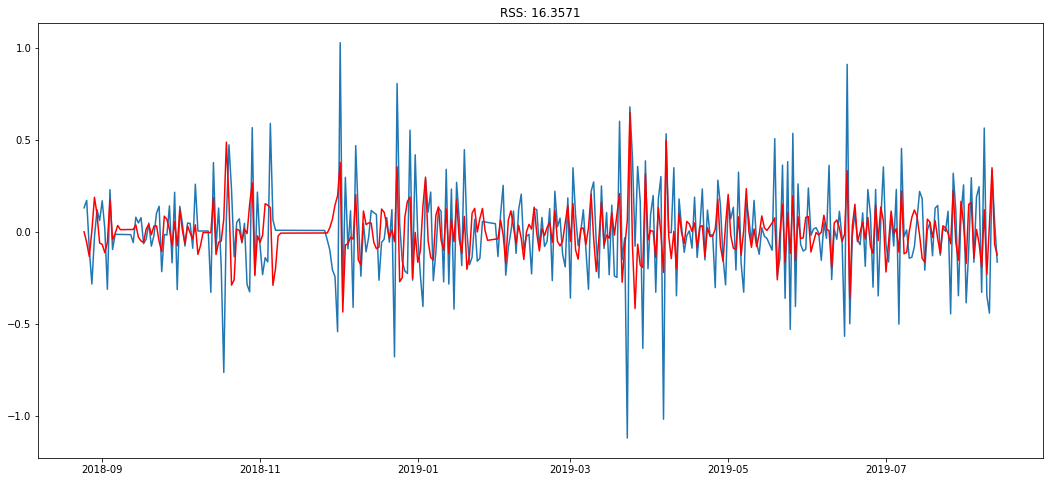

In [13]:
#MA model:
fig = plt.figure(figsize=(18,8))
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

print(results_AR.summary())

### MA Model

In [14]:
# fig = plt.figure(figsize=(18,8))
# model = ARIMA(ts_log, order=(0, 1, 2))  
# results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# print(results_MA.summary())

### ARIMA Model:

(Combined Model of AR and MA)

/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  354
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  84.208
Method:                       css-mle   S.D. of innovations              0.189
Date:                Sat, 17 Aug 2019   AIC                           -156.417
Time:                        18:26:44   BIC                           -133.201
Sample:                    08-25-2018   HQIC                          -147.180
                         - 08-13-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0004      0.000     -3.196      0.002      -0.001      -0.000
ar.L1.D.Value    -0.8427      0.053    -15.989      0.000      -0.946      -0.739
ar.L2.D.Value     0.1457      0.053     

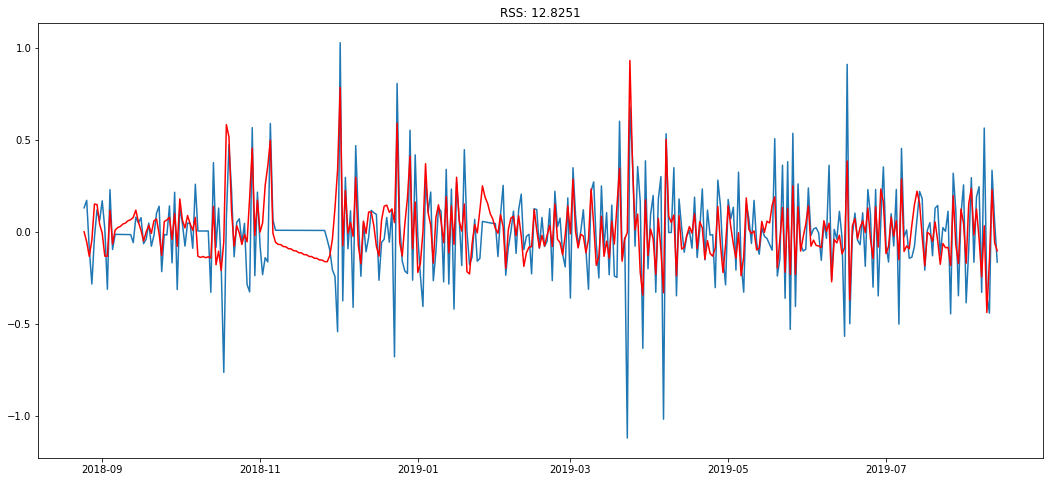

In [24]:
fig = plt.figure(figsize=(18,8))
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

print(results_ARIMA.summary())

### Convert to original scale:

In [16]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2018-08-25   -0.000368
2018-08-26   -0.055373
2018-08-27   -0.134018
2018-08-28   -0.045926
2018-08-29    0.150384
dtype: float64


In [17]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2018-08-25   -0.000368
2018-08-26   -0.055741
2018-08-27   -0.189759
2018-08-28   -0.235685
2018-08-29   -0.085301
dtype: float64


In [18]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
2018-08-24    6.016157
2018-08-25    6.015789
2018-08-26    5.960416
2018-08-27    5.826398
2018-08-28    5.780472
dtype: float64

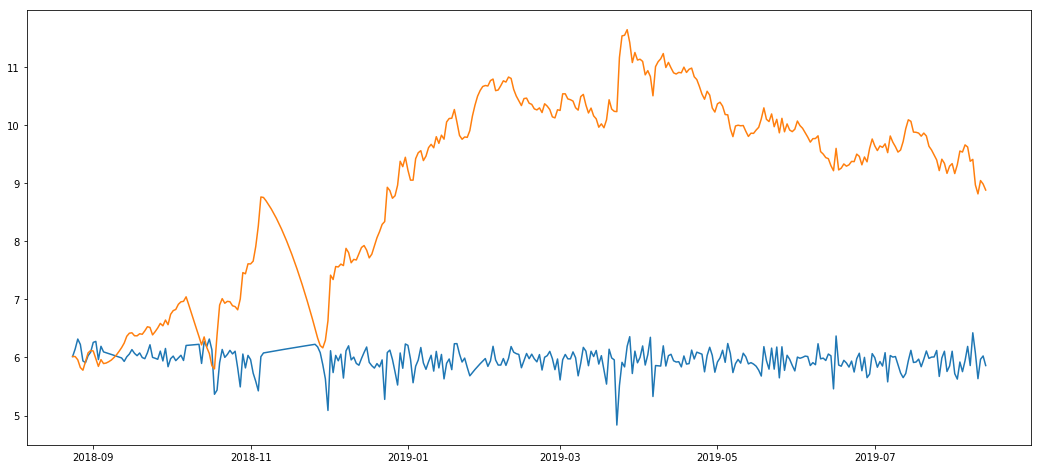

In [19]:
fig = plt.figure(figsize=(18,8))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

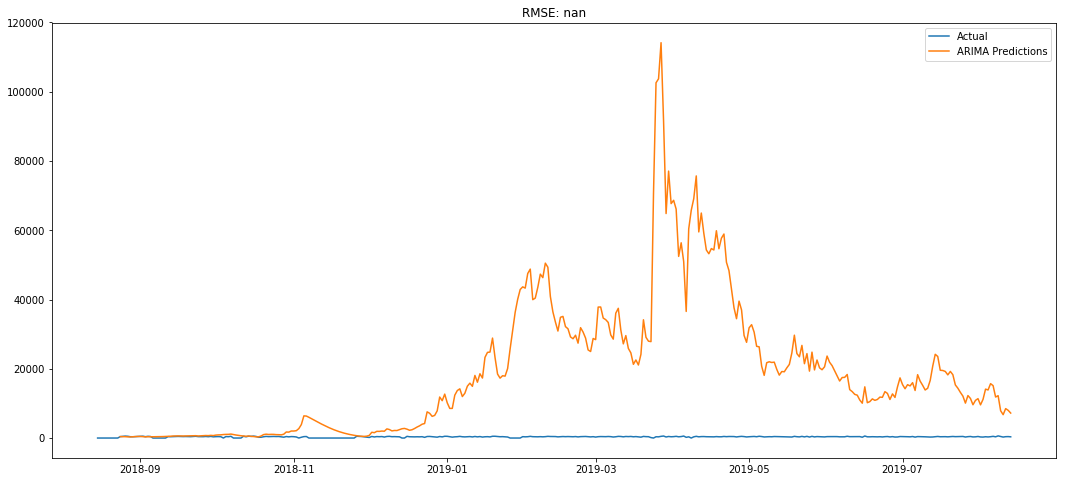

In [20]:
fig = plt.figure(figsize=(18,8))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, label='Actual')
plt.plot(predictions_ARIMA, label='ARIMA Predictions')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.legend(loc='best')

## Forecasting (Manual Walkthrough)

### Accuracy metrics

In [21]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
 
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

In [ ]:
# Build Model
model = ARIMA(train, order=(2, 1, 2)) 
fitted = model.fit(disp=-1)  
# print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


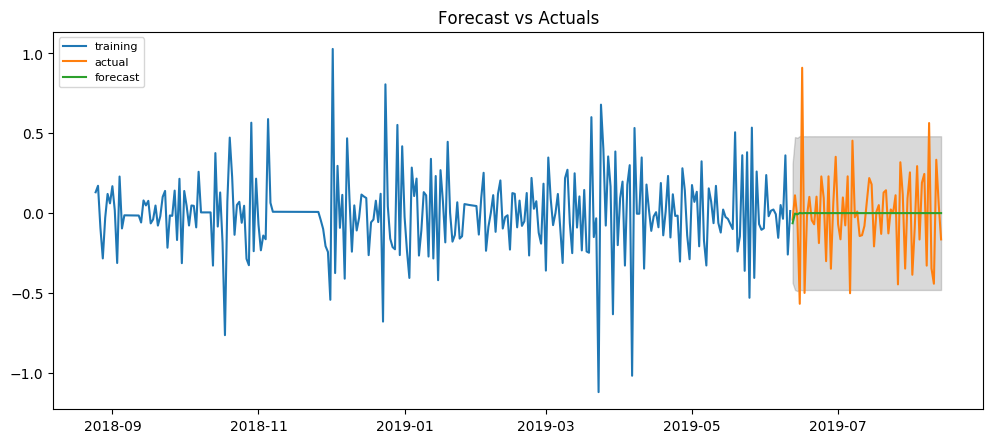

{'mape': 0.9931455563432545,
 'me': 0.00044341835407995107,
 'mae': 0.2043960601965074,
 'mpe': -0.9753390282301397,
 'rmse': 0.2679198505142332,
 'acf1': -0.5203130895483925,
 'corr': 0.0036772343246784136,
 'minmax': -336.90006475468095}

In [26]:
# Build Model
model = ARIMA(train, order=(2, 0, 2)) 
fitted = model.fit(disp=-1)  
# print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

## Auto Arima Model Selection and Forecast

In [27]:
import pmdarima as pm

In [28]:
series.replace(0, np.nan, inplace=True)
series = series.interpolate(method='time') # time or linear
if series.isna().sum() > 0:
    series.dropna(inplace=True)
ts = series 

In [29]:
ts = ts.reset_index(drop=True)
split_num = round(len(ts)*.8)
train = ts[:split_num]
test = ts[split_num:]
forecast_num = len(test)

In [30]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=3215.168, BIC=3229.764, Fit time=0.073 seconds
Fit ARIMA: order=(0, 0, 0); AIC=3230.980, BIC=3238.278, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=3214.979, BIC=3225.926, Fit time=0.021 seconds
Fit ARIMA: order=(0, 0, 1); AIC=3218.299, BIC=3229.246, Fit time=0.012 seconds
Fit ARIMA: order=(2, 0, 0); AIC=3214.844, BIC=3229.440, Fit time=0.036 seconds
Fit ARIMA: order=(2, 0, 1); AIC=3219.167, BIC=3237.412, Fit time=0.321 seconds
Fit ARIMA: order=(3, 0, 1); AIC=3218.743, BIC=3240.637, Fit time=0.130 seconds
Fit ARIMA: order=(3, 0, 0); AIC=3216.746, BIC=3234.991, Fit time=0.070 seconds
Total fit time: 0.672 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  284
Model:                     ARMA(2, 0)   Log Likelihood               -1603.422
Method:                       css-mle   S.D. of innovations             68.496
Date:                S

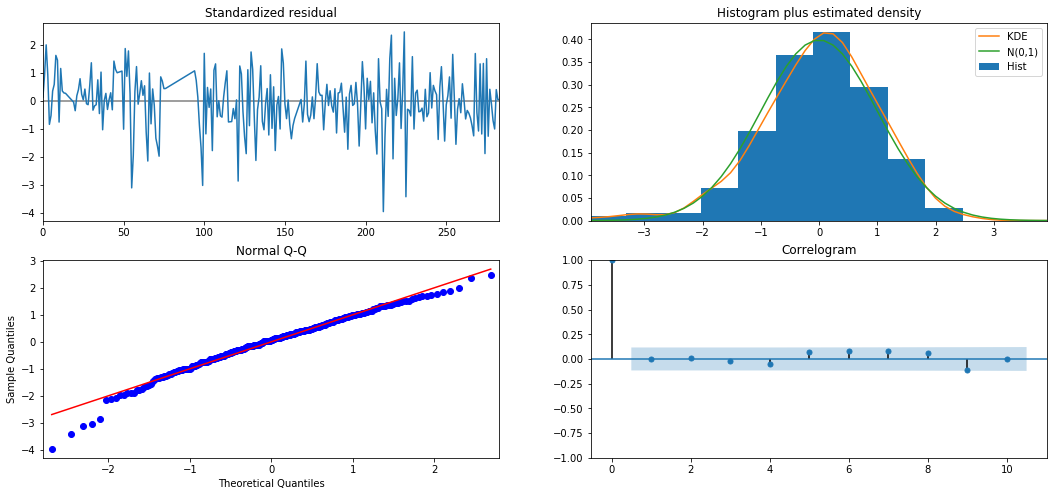

In [31]:
model.plot_diagnostics(figsize=(18,8))
plt.show()

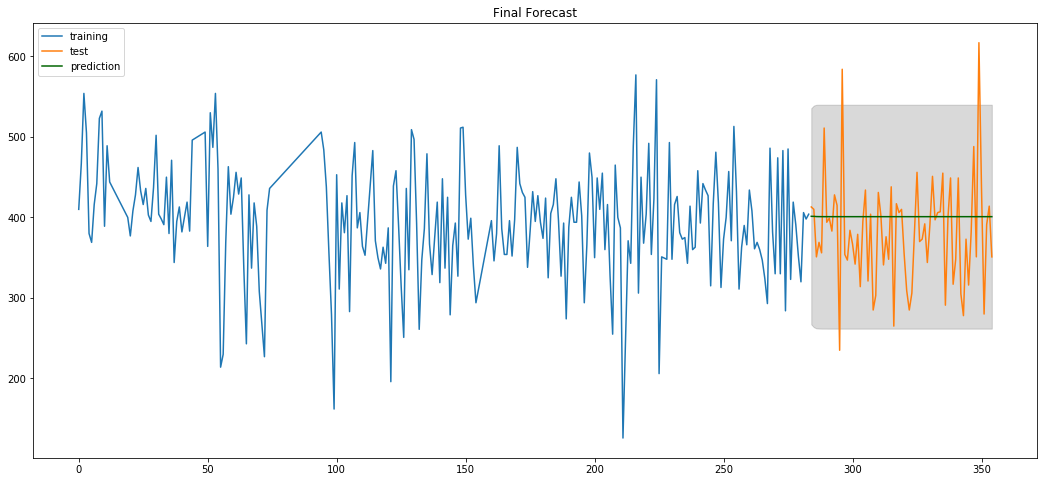

{'mape': 0.1472133964567234,
 'me': 20.304890771669857,
 'mae': 51.49013882309939,
 'mpe': 0.08460785813405033,
 'rmse': 69.06456963183933,
 'acf1': -0.1452257431646744,
 'corr': 0.06751941650223724,
 'minmax': 0.12083888905903917}

In [33]:
# Forecast
n_periods = forecast_num
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(18,8))
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.plot(fc_series, color='darkgreen', label='prediction')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='best')

plt.title("Final Forecast")
plt.show()

forecast_accuracy(fc, test.values)